In [1]:
import matplotlib.pyplot as plt
from skest import *
import scipy
import time
from signals import *
import numpy as np

### different noise level

In [2]:
n = 44
p = 66
m1 = 30
m2 = 6
G = nx.barbell_graph(m1, m2)
Psi = cor_from_G(G, 0.5)
D = D_from_G(G)
beta_star = barbell_signal(m1, m2, 5, 15)

### sigma = 1

In [11]:
sigma = 1

In [12]:
X, y = gauss_sample(n, p, beta_star, Psi, sigma)

In [13]:
D_w = weighted_incidence(cov_est(0.3).fit(X).S)

In [14]:
D_w.shape

(875, 66)

In [15]:
D_oracle = weighted_incidence(Psi)

In [30]:
D_oracle.shape

(2145, 66)

In [38]:
print(naive_cv_lasso(X, y))
print(naive_cv(EN, X, y))
print(naive_cv(FL, X, y, D))
print(naive_cv(SL, X, y, D))

({'l1': 0, 'l2': 0}, 0.32036352157592773)


C:\Users\sswei\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [  -224.08541946   -224.08236951   -224.67911633   -227.34531867
   -230.67719985   -240.8045357    -257.88677342   -292.75379192
   -365.54327439   -441.70170683   -606.64015848   -832.59801625
  -1081.80621866  -1351.84204369  -1641.04288939  -2276.1086528
  -9375.65109243   -235.42382582   -225.68506756   -227.55714575
   -230.79041736   -240.83914979   -257.90584277   -292.79537364
   -365.33899978   -441.72196354   -606.15397525   -832.98425214
  -1081.90594012  -1351.95881476  -1641.78995314  -2273.61455947
             nan   -349.89019203   -235.9554572    -229.38643004
   -231.71692396   -241.23061056   -258.11352197   -292.91776327
   -365.41669219   -441.77195252   -606.1965386    -832.94836341
  -1082.07237964  -1352.18667531  -1641.76103406  -2276.13079426
  -9377.46800551  -1041.20772818   -285.2980391    -238.59143748
   -235.89340

({'l1': 0, 'l2': 0.001}, 4.795212984085083)
({'l1': 0.5, 'l2': 0.05}, 10.127335548400879)
({'l1': 0.01, 'l2': 0.05}, 10.783821105957031)


In [33]:
print(naive_cv_gtv(X, y, D_oracle))

({'l1': 0.25, 'l2': 1, 'l3': 0}, 40.23735213279724)


In [35]:
print(naive_cv_gtv(X, y, D_w))

({'l1': 0.25, 'l2': 0, 'l3': 0}, 18.164422273635864)


In [41]:
naive_cv(OUR, X, y, D)

({'l1': 0.25, 'l2': 1}, 15.03237533569336)

In [16]:
def trial1():
    X, y = gauss_sample(n, p, beta_star, Psi, sigma)
    clf1 = OLR().fit(X, y)
    clf2 = LA(l1 = 0).fit(X,y)
    clf3 = EN(l1= 0, l2=0.001).fit(X,y)
    clf4 = FL(0, 0.25, D).fit(X,y)
    clf5 = SL(0.1, 2, D).fit(X,y)
    clf6 = GTV(0.25, 0, 0, D_w).fit(X,y)
    clf7 = GTV(0.25, 1, 0, D_oracle).fit(X,y)
    clf8 = OUR(0.25, 1, D).fit(X,y)
    return [c.l2_risk(beta_star) for c in [clf1, clf2, clf3, clf4, clf5, clf6, clf7, clf8]]

In [17]:
def trial2():
    X, y = gauss_sample(n, p, beta_star, Psi, sigma)
    clf1 = OLR().fit(X, y)
    clf2 = LA(l1 = 0).fit(X,y)
    clf3 = EN(l1= 0, l2=0.001).fit(X,y)
    clf4 = FL(0, 0.25, D).fit(X,y)
    clf5 = SL(0.1, 2, D).fit(X,y)
    clf6 = GTV(0.25, 0, 0, D_w).fit(X,y)
    clf7 = GTV(0.25, 1, 0, D_oracle).fit(X,y)
    clf8 = OUR(0.25, 1, D).fit(X,y)
    X2, y2 = gauss_sample(n, p, beta_star, Psi, sigma)
    return [-c.score(X2, X2@beta_star) for c in [clf1, clf2, clf3, clf4, clf5, clf6, clf7, clf8]]

In [18]:
from joblib import Parallel, delayed
import multiprocessing

In [19]:
l2s = Parallel(n_jobs=8)(delayed(trial1)() for i in range(500))
preds = Parallel(n_jobs=8)(delayed(trial2)() for i in range(500))

In [20]:
ar1 = [l[0] for l in l2s]
ar2 = [l[1] for l in l2s]
ar3 = [l[2] for l in l2s]
ar4 = [l[3] for l in l2s]
ar5 = [l[4] for l in l2s]
ar6 = [l[5] for l in l2s]
ar7 = [l[6] for l in l2s]
ar8 = [l[7] for l in l2s]

In [21]:
ap1 = [l[0] for l in preds]
ap2 = [l[1] for l in preds]
ap3 = [l[2] for l in preds]
ap4 = [l[3] for l in preds]
ap5 = [l[4] for l in preds]
ap6 = [l[5] for l in preds]
ap7 = [l[6] for l in preds]
ap8 = [l[7] for l in preds]


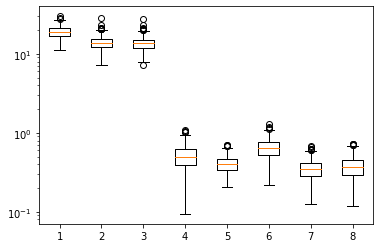

In [22]:
plt.boxplot([ar1, ar2, ar3, ar4, ar5, ar6, ar7, ar8])
plt.yscale("log")

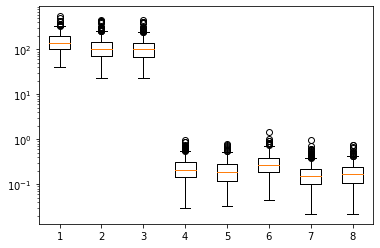

In [23]:
plt.boxplot([ap1, ap2, ap3, ap4, ap5, ap6, ap7, ap8])
plt.yscale("log")

### sigma = 2

In [24]:
sigma = 2

In [25]:
X, y = gauss_sample(n, p, beta_star, Psi, sigma)

In [77]:
naive_cv_cov(X)

({'t': 0.4}, 0.047705650329589844)

In [26]:
D_w = weighted_incidence(cov_est(0.3).fit(X).S)

In [27]:
D_w.shape

(881, 66)

In [70]:
print(naive_cv_lasso(X, y))
print(naive_cv(EN, X, y, D))
print(naive_cv(FL, X, y, D))
print(naive_cv(SL, X, y, D))

({'l1': 0, 'l2': 0}, 0.3253939151763916)


C:\Users\sswei\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [ -369.20106391  -369.23326815  -370.13886211  -374.2076578
  -379.20431114  -394.40603539  -419.59392632  -469.71486524
  -569.74785614  -671.60317599  -881.89884025 -1160.095454
 -1464.06527725 -1786.40719849 -2128.16327173 -2871.08159388
 -6841.44219904  -390.35046766  -372.24377964  -374.61944283
  -379.47567934  -394.50157682  -419.64378098  -469.76462082
  -569.99256748  -671.56637304  -881.9686613  -1162.02890543
 -1463.96017637 -1786.40092265 -2128.47805529 -2870.81277597
            nan  -579.28696603  -391.22448508  -378.43735802
  -381.40578439  -395.31033183  -420.07058365  -470.00727555
  -570.14105709  -671.65956369  -882.09793453 -1162.57540428
 -1464.12556438 -1786.41634367 -2129.26323929 -2872.0589534
 -7060.20402996 -1258.50650413  -475.77303261  -395.6036035
  -390.05753324  -398.87866236  -421.97701736  -471.077933
  -570.779

({'l1': 0, 'l2': 0}, 5.137503385543823)
({'l1': 0, 'l2': 0.01}, 10.330960988998413)
({'l1': 0.25, 'l2': 2}, 10.458461046218872)


In [105]:
print(naive_cv_gtv(X, y, D_oracle))


C:\Users\sswei\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [ -8.31359588  -8.2378172   -7.68944059  -5.54150115  -4.72201538
  -4.33592311  -4.12470757  -4.0625579   -4.10734047  -4.3185852
  -4.73887191  -5.31816633  -6.04599368  -6.9106621   -9.09171604
  -9.784114            nan  -7.67196498  -5.5321418   -4.71928545
  -4.33480356  -4.12437762  -4.06216421  -4.10682122  -4.3177451
  -4.74025258  -5.31781228  -6.04529067  -6.91755394  -9.09161243
  -9.15478063  -8.8085176   -7.5785897   -5.4526672   -4.69212849
  -4.32616259  -4.12188117  -4.06107615  -4.10583606  -4.31711509
  -4.7392657   -5.31696584  -6.04377693  -6.91666436  -9.09115678
  -6.58379371  -6.53112807  -6.08000007  -5.01114938  -4.53338782
  -4.27900526  -4.1147358   -4.05583749  -4.09939372  -4.31039895
  -4.73140577  -5.30817165  -6.03619854  -6.91059787  -9.09047199
  -5.35487681  -5.34633264  -5.28323894  -4.83665959  -4.53107916
 

({'l1': 0.1, 'l2': 2, 'l3': 0}, 40.141443490982056)


In [106]:
print(naive_cv_gtv(X, y, D_w))

({'l1': 1, 'l2': 0.25, 'l3': 0}, 18.994938373565674)


C:\Users\sswei\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [ -8.37037503  -8.33218181  -7.9744748   -6.75703736  -6.49761372
  -6.54983874  -6.84978435  -7.6068022   -8.55484011 -11.01021355
 -14.93192368 -19.56966353 -24.69645516 -30.21120321 -41.85899486
 -10.12769527  -8.25108848  -7.91369611  -6.73462467  -6.48634929
  -6.54240167  -6.84207658  -7.60014478  -8.55080087 -11.00677391
 -14.93422203 -19.56997456 -24.70502558 -30.20264266 -41.89199514
  -9.50306775          nan  -7.58191276  -6.53958175  -6.38657202
  -6.48342583  -6.80719301  -7.58067548  -8.53688132 -10.99837726
 -14.92763217 -19.56405637 -24.70171706 -30.20009832 -41.8885588
  -6.04046866  -6.04554487  -5.95329794  -5.45626987  -5.54336187
  -5.95017558  -6.47005234  -7.38813755  -8.40498485 -10.91750427
 -14.87356837 -19.52504543 -24.67649038 -30.18070667 -41.87806631
  -4.97057518  -4.96617158  -4.93933354  -4.8155994   -4.83651425


In [84]:
naive_cv(OUR, X, y, D)

({'l1': 1, 'l2': 3}, 16.289026498794556)

In [28]:
def trial1():
    X, y = gauss_sample(n, p, beta_star, Psi, sigma)
    clf1 = OLR().fit(X, y)
    clf2 = LA(l1 = 0).fit(X,y)
    clf3 = EN(l1= 0, l2=0.001).fit(X,y)
    clf4 = FL(0, 1, D).fit(X,y)
    clf5 = SL(0.25, 2, D).fit(X,y)
    clf6 = GTV(1, 0.25, 0, D_w).fit(X,y)
    clf7 = GTV(0.1, 2, 0, D_oracle).fit(X,y)
    clf8 = OUR(1, 3, D).fit(X,y)
    return [c.l2_risk(beta_star) for c in [clf1, clf2, clf3, clf4, clf5, clf6, clf7, clf8]]

In [29]:
def trial2():
    X, y = gauss_sample(n, p, beta_star, Psi, sigma)
    clf1 = OLR().fit(X, y)
    clf2 = LA(l1 = 0).fit(X,y)
    clf3 = EN(l1= 0, l2=0.001).fit(X,y)
    clf4 = FL(0, 1, D).fit(X,y)
    clf5 = SL(0.25, 2, D).fit(X,y)
    clf6 = GTV(1, 0.25, 0, D_w).fit(X,y)
    clf7 = GTV(0.1, 2, 0, D_oracle).fit(X,y)
    clf8 = OUR(1, 3, D).fit(X,y)
    X2, y2 = gauss_sample(n, p, beta_star, Psi, sigma)
    return [-c.score(X2, X2@beta_star) for c in [clf1, clf2, clf3, clf4, clf5, clf6, clf7, clf8]]

In [30]:
l2s = Parallel(n_jobs=8)(delayed(trial1)() for i in range(500))
preds = Parallel(n_jobs=8)(delayed(trial2)() for i in range(500))

In [31]:
br1 = [l[0] for l in l2s]
br2 = [l[1] for l in l2s]
br3 = [l[2] for l in l2s]
br4 = [l[3] for l in l2s]
br5 = [l[4] for l in l2s]
br6 = [l[5] for l in l2s]
br7 = [l[6] for l in l2s]
br8 = [l[7] for l in l2s]

In [32]:
bp1 = [l[0] for l in preds]
bp2 = [l[1] for l in preds]
bp3 = [l[2] for l in preds]
bp4 = [l[3] for l in preds]
bp5 = [l[4] for l in preds]
bp6 = [l[5] for l in preds]
bp7 = [l[6] for l in preds]
bp8 = [l[7] for l in preds]


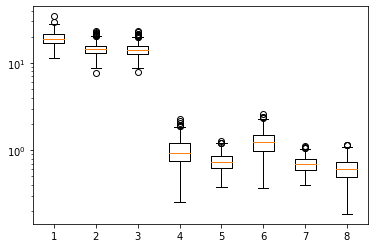

In [33]:
plt.boxplot([br1, br2, br3, br4, br5, br6, br7, br8])
plt.yscale("log")

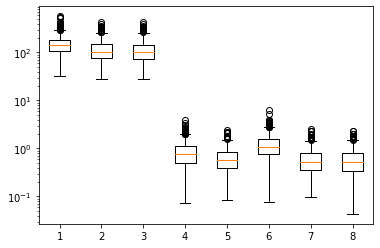

In [34]:
plt.boxplot([bp1, bp2, bp3, bp4, bp5, bp6, bp7, bp8])
plt.yscale("log")

### sigma = 3

In [47]:
sigma = 3

In [48]:
X, y = gauss_sample(n, p, beta_star, Psi, sigma)
naive_cv_cov(X)

({'t': 0.3}, 0.039246320724487305)

In [49]:
D_w = weighted_incidence(cov_est(0.3).fit(X).S)

In [50]:
D_w.shape

(882, 66)

In [117]:
print(naive_cv_lasso(X, y))
print(naive_cv(EN, X, y,D))
print(naive_cv(FL, X, y, D))
print(naive_cv(SL, X, y, D))

({'l1': 0, 'l2': 0}, 0.31529879570007324)


C:\Users\sswei\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [ -233.68964325  -233.7067169   -234.31987384  -237.08681136
  -240.57965607  -251.50711291  -270.59205589  -311.54459592
  -398.75239179  -491.1453385   -687.20746188  -954.18433687
 -1242.95653527 -1552.58121193 -1882.2148822  -2598.17776479
 -4192.70312786  -240.70831855  -234.84329891  -237.16506943
  -240.62673057  -251.52290084  -270.72361759  -311.56203277
  -398.75993238  -490.95277349  -687.45308849  -954.22490468
 -1243.12415643 -1553.05931366 -1882.9414432  -2597.54981023
            nan  -330.0132453   -241.24930555  -238.08272045
  -241.07347325  -251.71570606  -270.83417403  -311.62137943
  -398.79466525  -490.98425523  -687.64516474  -954.27798053
 -1243.16460523 -1553.09758187 -1882.83326958 -2598.67875084
 -4195.10539186  -833.27385431  -279.06630265  -243.98822737
  -243.64511925  -252.58032744  -271.33284889  -311.94226859
  -

({'l1': 0, 'l2': 0}, 5.164907693862915)
({'l1': 0, 'l2': 20}, 8.518138408660889)
({'l1': 0, 'l2': 3}, 11.40188455581665)


In [235]:
print(naive_cv_gtv(X, y, D_oracle))
print(naive_cv_gtv(X, y, D_w))

C:\Users\sswei\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [-28.17348612 -27.80449427 -26.02019268 -18.38988757 -14.80423632
 -12.91673581 -11.88347632 -11.57164009 -11.68391763 -12.2158086
 -13.11618837 -14.21189702 -15.49734894 -16.97162888 -20.44866574
 -32.54477065          nan          nan -18.36495164 -14.79363963
 -12.91308227 -11.88345424 -11.57218694 -11.68539946 -12.2100241
 -13.11328664 -14.21574761 -15.50285499 -16.97208221 -20.45316238
 -31.3541868  -30.12554707 -25.94665215 -18.13768488 -14.69936223
 -12.88255688 -11.88337854 -11.57856544 -11.69047902 -12.21343394
 -13.11533918 -14.21697033 -15.5037808  -16.97242145 -20.45353329
 -22.48311928 -22.34806853 -21.15290188 -16.07143034 -13.92724608
 -12.66367974 -11.91375922 -11.64936124 -11.74817887 -12.2507975
 -13.13680261 -14.23057535 -15.5151588  -16.98260035 -20.46350655
 -16.17638564 -16.15310858 -15.96283006 -14.57507311 -13.4623301
 -1

({'l1': 0, 'l2': 2, 'l3': 0}, 43.40549325942993)
({'l1': 2, 'l2': 0, 'l3': 0}, 19.52872371673584)


C:\Users\sswei\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [ -36.17528546  -35.97214479  -34.27455313  -27.00527159  -23.77027181
  -22.44169999  -22.70701241  -25.83964096  -30.31452174  -41.92075793
  -60.725464    -83.8203224  -111.2919956  -142.51542585 -215.91784766
  -35.19095335           nan  -33.78803373  -26.92450534  -23.73496168
  -22.42252329  -22.69751726  -25.83506891  -30.31270291  -41.91268881
  -60.69957462  -83.90299802 -111.24590424 -142.5068119  -215.98934754
  -34.56052417           nan  -30.93530744  -26.21494766  -23.41926202
  -22.25874432  -22.61341978  -25.79252143  -30.2839237   -41.89405424
  -60.69190014  -83.89591664 -111.24676357 -142.48466485 -215.9978023
  -24.00494418  -24.10717357  -22.8449663   -21.17592488  -20.69738412
  -20.77084582  -21.82685945  -25.38491123  -30.0000397   -41.73082502
  -60.5975813   -83.82747915 -111.19928415 -142.49385609 -216.02802613
  -17.

In [64]:
naive_cv(OUR, X, y, D)

({'l1': 30, 'l2': 15}, 13.963613510131836)

In [51]:
def trial1():
    X, y = gauss_sample(n, p, beta_star, Psi, sigma)
    clf1 = OLR().fit(X, y)
    clf2 = LA(l1 = 0).fit(X,y)
    clf3 = EN(l1= 0, l2=0.001).fit(X,y)
    clf4 = FL(1, 2, D).fit(X,y)
    clf5 = SL(0, 7.5, D).fit(X,y)
    clf6 = GTV(2, 0, 0, D_w).fit(X,y)
    clf7 = GTV(0.01, 2, 0, D_oracle).fit(X,y)
    clf8 = OUR(1, 5, D).fit(X,y)
    return [c.l2_risk(beta_star) for c in [clf1, clf2, clf3, clf4, clf5, clf6, clf7, clf8]]

def trial2():
    X, y = gauss_sample(n, p, beta_star, Psi, sigma)
    clf1 = OLR().fit(X, y)
    clf2 = LA(l1 = 0).fit(X,y)
    clf3 = EN(l1= 0, l2=0.001).fit(X,y)
    clf4 = FL(1, 2, D).fit(X,y)
    clf5 = SL(0, 7.5, D).fit(X,y)
    clf6 = GTV(2, 0, 0, D_w).fit(X,y)
    clf7 = GTV(0.01, 2, 0, D_oracle).fit(X,y)
    clf8 = OUR(1, 5, D).fit(X,y)
    X2, y2 = gauss_sample(n, p, beta_star, Psi, sigma)
    return [-c.score(X2, X2@beta_star) for c in [clf1, clf2, clf3, clf4, clf5, clf6, clf7, clf8]]

In [52]:
l2s = Parallel(n_jobs=8)(delayed(trial1)() for i in range(500))
preds = Parallel(n_jobs=8)(delayed(trial2)() for i in range(500))

In [53]:
cr1 = [l[0] for l in l2s]
cr2 = [l[1] for l in l2s]
cr3 = [l[2] for l in l2s]
cr4 = [l[3] for l in l2s]
cr5 = [l[4] for l in l2s]
cr6 = [l[5] for l in l2s]
cr7 = [l[6] for l in l2s]
cr8 = [l[7] for l in l2s]

In [54]:
cp1 = [l[0] for l in preds]
cp2 = [l[1] for l in preds]
cp3 = [l[2] for l in preds]
cp4 = [l[3] for l in preds]
cp5 = [l[4] for l in preds]
cp6 = [l[5] for l in preds]
cp7 = [l[6] for l in preds]
cp8 = [l[7] for l in preds]

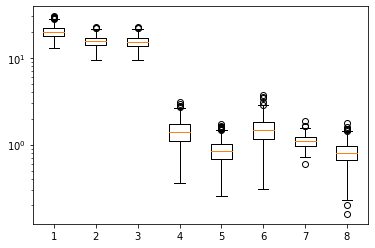

In [55]:
plt.boxplot([cr1, cr2, cr3, cr4, cr5, cr6, cr7, cr8])
plt.yscale("log")

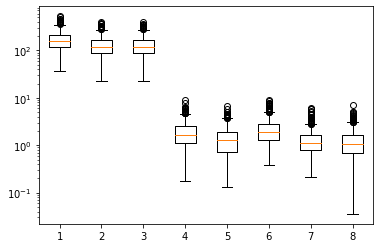

In [56]:
plt.boxplot([cp1, cp2, cp3, cp4, cp5, cp6, cp7, cp8])
plt.yscale("log")

### sigma = 4

In [65]:
sigma = 4

In [66]:
X, y = gauss_sample(n, p, beta_star, Psi, sigma)
naive_cv_cov(X)

({'t': 0.25}, 0.035555362701416016)

In [67]:
D_w = weighted_incidence(cov_est(0.3).fit(X).S)

In [68]:
D_w.shape

(894, 66)

In [153]:
print(naive_cv_lasso(X, y))
print(naive_cv(EN, X, y,D))
print(naive_cv_large(FL, X, y, D))
print(naive_cv(SL, X, y, D))

({'l1': 0, 'l2': 0}, 0.27881813049316406)


C:\Users\sswei\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [ -390.96352982  -390.95961357  -391.61187179  -394.44464191
  -398.03695405  -409.15679071  -428.68527867  -470.9806207
  -565.49420364  -671.24913486  -908.36438676 -1244.35409066
 -1617.69711006 -2021.70537902 -2455.03462189 -3394.01311874
 -8171.78003847  -406.17333918  -393.0290248   -394.75662176
  -398.16256118  -409.19216036  -428.72121923  -470.99833772
  -565.70380304  -671.30608616  -908.46701981 -1244.78221338
 -1617.72324893 -2022.19489488 -2454.93807852 -3383.51630214
            nan  -601.15113431  -406.82594974  -397.32493195
  -399.46056894  -409.6530412   -428.96835405  -471.13635275
  -565.81470776  -671.35053045  -908.58052061 -1244.85016912
 -1617.80564701 -2022.38484397 -2455.76196765 -3393.54624839
 -8175.87743617 -1540.03135627  -489.71413365  -409.74146063
  -405.08987324  -411.88308419  -430.08270781  -471.77637045
  -5

({'l1': 0, 'l2': 0.001}, 5.387151718139648)
({'l1': 0, 'l2': 150}, 17.535155057907104)
({'l1': 1, 'l2': 10}, 10.31807827949524)


In [246]:
print(naive_cv_gtv(X, y, D_oracle))
print(naive_cv_gtv(X, y, D_w))

C:\Users\sswei\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [-46.02103234 -45.73289264 -43.29784087 -33.17950504 -28.81457812
 -26.46552467 -24.83676434 -23.82648628 -23.5594268  -23.6824839
 -24.26965613 -25.07891913 -26.07482237 -27.19466603 -29.84592804
 -52.20213222          nan -43.30940502 -33.16050329 -28.80650322
 -26.46050224 -24.83436282 -23.82407931 -23.5602168  -23.6813737
 -24.26995794 -25.084234   -26.06086063 -27.18095905 -29.85095329
 -51.36268639 -48.95566306 -43.22825434 -32.9864986  -28.72535339
 -26.40929534 -24.80332115 -23.80428544 -23.54552052 -23.67056286
 -24.26122311 -25.07781586 -26.05551283 -27.17740778 -29.84790363
 -45.72466352 -44.79371864 -40.98615485 -31.24981252 -27.90333486
 -25.95753293 -24.48700831 -23.60699035 -23.3981382  -23.56926974
 -24.18396804 -25.01779819 -26.0050647  -27.13717413 -29.82331408
 -36.1450277  -35.95935578 -34.47967037 -29.56615881 -26.8235583
 -

({'l1': 5, 'l2': 2, 'l3': 0}, 45.081833839416504)
({'l1': 2, 'l2': 0.25, 'l3': 0}, 20.075055599212646)


C:\Users\sswei\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [ -47.70169065  -47.36014605  -45.63841289  -37.62505651  -33.72847275
  -32.15650426  -32.88644613  -37.42082242  -42.85685634  -54.22777686
  -68.8251756   -84.16550352 -100.58564286 -118.34440105 -158.5748169
  -55.65577031           nan  -45.58762653  -37.58436661  -33.70516876
  -32.14589164  -32.87541751  -37.41718088  -42.85227129  -54.22615204
  -68.83516535  -84.16542967 -100.58118559 -118.34130948 -158.48527052
  -54.24586843  -48.4250591   -45.05852217  -37.23880987  -33.50515197
  -32.0458634   -32.82088202  -37.38079879  -42.82638832  -54.20976306
  -68.82377924  -84.15397436 -100.57637346 -118.34026464 -158.4815938
  -49.38323296  -48.54889964  -43.79514783  -34.36695941  -31.64809335
  -31.10574188  -32.28501304  -37.04000878  -42.58467593  -54.04709827
  -68.71032079  -84.06895219 -100.50863999 -118.2910461  -158.46274135
  -41.7

In [271]:
naive_cv(OUR, X, y, D)

({'l1': 20, 'l2': 3}, 14.312340021133423)

In [69]:
def trial1():
    X, y = gauss_sample(n, p, beta_star, Psi, sigma)
    clf1 = OLR().fit(X, y)
    clf2 = LA(l1 = 0).fit(X,y)
    clf3 = EN(l1= 0, l2=0.001).fit(X,y)
    clf4 = FL(0, 70, D).fit(X,y)
    clf5 = SL(0, 7.5, D).fit(X,y)
    clf6 = GTV(2, 0.25, 0, D_w).fit(X,y)
    clf7 = GTV(2, 3, 0, D_oracle).fit(X,y)
    clf8 = OUR(20, 5, D).fit(X,y)
    return [c.l2_risk(beta_star) for c in [clf1, clf2, clf3, clf4, clf5, clf6, clf7, clf8]]

def trial2():
    X, y = gauss_sample(n, p, beta_star, Psi, sigma)
    clf1 = OLR().fit(X, y)
    clf2 = LA(l1 = 0).fit(X,y)
    clf3 = EN(l1= 0, l2=0.001).fit(X,y)
    clf4 = FL(0, 70, D).fit(X,y)
    clf5 = SL(0, 7.5, D).fit(X,y)
    clf6 = GTV(2, 0.25, 0, D_w).fit(X,y)
    clf7 = GTV(2, 3, 0, D_oracle).fit(X,y)
    clf8 = OUR(20, 5, D).fit(X,y)
    X2, y2 = gauss_sample(n, p, beta_star, Psi, sigma)
    return [-c.score(X2, X2@beta_star) for c in [clf1, clf2, clf3, clf4, clf5, clf6, clf7, clf8]]

In [70]:
l2s = Parallel(n_jobs=8)(delayed(trial1)() for i in range(500))
preds = Parallel(n_jobs=8)(delayed(trial2)() for i in range(500))

In [71]:
dr1 = [l[0] for l in l2s]
dr2 = [l[1] for l in l2s]
dr3 = [l[2] for l in l2s]
dr4 = [l[3] for l in l2s]
dr5 = [l[4] for l in l2s]
dr6 = [l[5] for l in l2s]
dr7 = [l[6] for l in l2s]
dr8 = [l[7] for l in l2s]

In [72]:
dp1 = [l[0] for l in preds]
dp2 = [l[1] for l in preds]
dp3 = [l[2] for l in preds]
dp4 = [l[3] for l in preds]
dp5 = [l[4] for l in preds]
dp6 = [l[5] for l in preds]
dp7 = [l[6] for l in preds]
dp8 = [l[7] for l in preds]

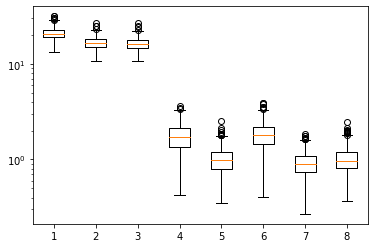

In [73]:
plt.boxplot([dr1, dr2, dr3, dr4, dr5, dr6, dr7, dr8])
plt.yscale("log")

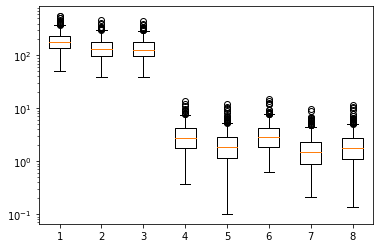

In [74]:
plt.boxplot([dp1, dp2, dp3, dp4, dp5, dp6, dp7, dp8])
plt.yscale("log")

### sigma = 5

In [133]:
sigma = 5

In [134]:
X, y = gauss_sample(n, p, beta_star, Psi, sigma)
naive_cv_cov(X)

({'t': 0.35}, 0.04396176338195801)

In [135]:
D_w = weighted_incidence(cov_est(0.3).fit(X).S)

In [136]:
D_w.shape

(897, 66)

In [192]:
print(naive_cv_lasso(X, y))
print(naive_cv(EN, X, y,D))
print(naive_cv_large(FL, X, y, D))
print(naive_cv(SL, X, y, D))

({'l1': 0, 'l2': 0}, 0.31592583656311035)


C:\Users\sswei\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [ -290.12818608  -290.17695457  -290.72984477  -293.25362282
  -296.66293287  -307.94554831  -329.21916222  -377.270698
  -484.62621118  -601.03242934  -849.15268016 -1181.4948334
 -1531.92742291 -1899.17017181 -2280.98053115 -3085.98952818
 -5830.95594596  -305.14385492  -292.22911344  -293.5831575
  -296.82601239  -308.00595045  -329.26990328  -377.29764883
  -484.79535209  -600.99652976  -849.61668066 -1181.81973217
 -1532.59238864 -1899.32585053 -2280.55799229 -3081.85636488
            nan  -445.86660569  -305.70145479  -296.32799832
  -298.22259598  -308.60027787  -329.57181254  -377.48592448
  -484.91793035  -601.11252766  -849.70251109 -1182.11117261
 -1532.72281321 -1899.54261286 -2280.77559766 -3082.67129126
 -5819.53899494 -1066.26043213  -366.87775115  -308.38446478
  -304.46738792  -311.21877218  -330.91280958  -378.31573826
  -485.

({'l1': 0, 'l2': 0}, 5.305630683898926)
({'l1': 0, 'l2': 80}, 19.00904154777527)
({'l1': 0.001, 'l2': 10}, 10.748892068862915)


In [197]:
print(naive_cv_gtv(X, y, D_oracle))
print(naive_cv_gtv(X, y, D_w))

C:\Users\sswei\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [-69.86209105 -69.23055811 -65.23237506 -49.52679961 -42.1850455
 -38.05156094 -35.48223857 -34.38011957 -34.31789164 -34.85114768
 -35.90522358 -37.18813555 -38.65922678 -40.30716092 -44.14414495
 -70.11079421          nan -65.09192352 -49.48318205 -42.16823657
 -38.04478418 -35.48298539 -34.38023868 -34.32016457 -34.85203869
 -35.90507612 -37.18681776 -38.65773573 -40.31146486 -44.15611068
 -67.35982057 -66.65488721 -63.76048473 -49.10403493 -42.00937734
 -37.9864107  -35.46854893 -34.37767411 -34.32094857 -34.85355424
 -35.90625114 -37.18863225 -38.65953581 -40.31597284 -44.15686544
 -57.65561346 -57.5318464  -54.72062026 -45.62011266 -40.66198424
 -37.44741013 -35.31132811 -34.35752485 -34.32805719 -34.87395154
 -35.93083093 -37.21557076 -38.69235599 -40.35119155 -44.19646505
 -50.07182943 -49.73957107 -46.98559822 -41.90080235 -38.87294876


({'l1': 1, 'l2': 2, 'l3': 0}, 42.75952076911926)
({'l1': 7.5, 'l2': 0.5, 'l3': 0}, 19.589649438858032)


C:\Users\sswei\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [ -71.84180894  -71.3780121   -68.88266612  -57.25907732  -50.64999308
  -46.59306321  -44.53104791  -46.0686386   -49.75093511  -59.46385812
  -73.98092578  -90.45326362 -108.73126311 -128.74289924 -173.56030869
  -69.38924882           nan  -68.65312783  -57.20570377  -50.62536076
  -46.57779812  -44.52253301  -46.06663513  -49.76299868  -59.45920095
  -73.95193299  -90.45342426 -108.73794958 -128.73052635 -173.56458839
  -68.53002943           nan  -66.77961616  -56.70101714  -50.38879819
  -46.44513527  -44.46211455  -46.02682139  -49.73356701  -59.43710225
  -73.94309533  -90.43970881 -108.72890235 -128.72354703 -173.56278635
  -60.32352127  -60.36579405  -58.207226    -52.19792171  -48.2486067
  -45.16770046  -43.87177386  -45.64576468  -49.44681648  -59.23860822
  -73.82095192  -90.36000342 -108.68873323 -128.70403449 -173.57735013
  -54.

In [198]:
naive_cv_large(OUR, X, y, D)

({'l1': 0.5, 'l2': 5}, 33.34769082069397)

In [137]:
def trial1():
    X, y = gauss_sample(n, p, beta_star, Psi, sigma)
    clf1 = OLR().fit(X, y)
    clf2 = LA(l1 = 0).fit(X,y)
    clf3 = EN(l1= 0, l2=0.001).fit(X,y)
    clf4 = FL(0, 80, D).fit(X,y)
    clf5 = SL(0.001, 10, D).fit(X,y)
    clf6 = GTV(3, 0.5, 0, D_w).fit(X,y)
    clf7 = GTV(1, 2, 0, D_oracle).fit(X,y)
    clf8 = OUR(2, 10, D).fit(X,y)
    return [c.l2_risk(beta_star) for c in [clf1, clf2, clf3, clf4, clf5, clf6, clf7, clf8]]

def trial2():
    X, y = gauss_sample(n, p, beta_star, Psi, sigma)
    clf1 = OLR().fit(X, y)
    clf2 = LA(l1 = 0).fit(X,y)
    clf3 = EN(l1= 0, l2=0.001).fit(X,y)
    clf4 = FL(0, 80, D).fit(X,y)
    clf5 = SL(0.001, 10, D).fit(X,y)
    clf6 = GTV(3, 0.5, 0, D_w).fit(X,y)
    clf7 = GTV(1, 2, 0, D_oracle).fit(X,y)
    clf8 = OUR(2, 10, D).fit(X,y)
    X2, y2 = gauss_sample(n, p, beta_star, Psi, sigma)
    return [-c.score(X2, X2@beta_star) for c in [clf1, clf2, clf3, clf4, clf5, clf6, clf7, clf8]]

In [138]:
l2s = Parallel(n_jobs=8)(delayed(trial1)() for i in range(500))
preds = Parallel(n_jobs=8)(delayed(trial2)() for i in range(500))

In [139]:
er1 = [l[0] for l in l2s]
er2 = [l[1] for l in l2s]
er3 = [l[2] for l in l2s]
er4 = [l[3] for l in l2s]
er5 = [l[4] for l in l2s]
er6 = [l[5] for l in l2s]
er7 = [l[6] for l in l2s]
er8 = [l[7] for l in l2s]

In [140]:
ep1 = [l[0] for l in preds]
ep2 = [l[1] for l in preds]
ep3 = [l[2] for l in preds]
ep4 = [l[3] for l in preds]
ep5 = [l[4] for l in preds]
ep6 = [l[5] for l in preds]
ep7 = [l[6] for l in preds]
ep8 = [l[7] for l in preds]

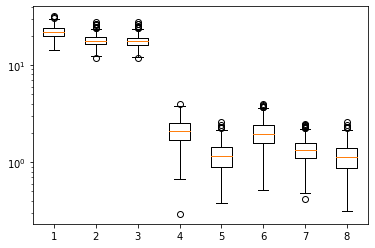

In [83]:
plt.boxplot([er1, er2, er3, er4, er5, er6, er7, er8])
plt.yscale("log")

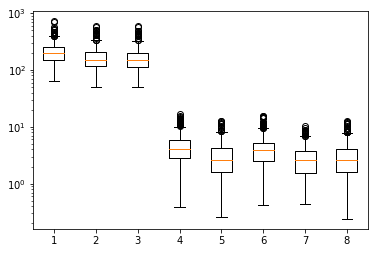

In [84]:
plt.boxplot([ep1, ep2, ep3, ep4, ep5, ep6, ep7, ep8])
plt.yscale("log")

### plots

In [141]:
import matplotlib as mpl
mpl.rcParams['mathtext.fontset'] = 'cm'

In [142]:
LA_risk_med = [np.median(r) for r in [ar1, br1, cr1, dr1, er1]]
LA_risk_err = [[np.median(r) - np.quantile(r, 0.25) for r in [ar1, br1, cr1, dr1, er1]], [np.quantile(r, 0.75) - np.median(r) for r in [ar1, br1, cr1, dr1, er1]]]

In [143]:
EN_risk_med = [np.median(r) for r in [ar3, br3, cr3, dr3, er3]]
EN_risk_err = [[np.median(r) - np.quantile(r, 0.25) for r in [ar3, br3, cr3, dr3, er3]], [np.quantile(r, 0.75) - np.median(r) for r in [ar3, br3, cr3, dr3, er3]]]

In [144]:
FL_risk_med = [np.median(r) for r in [ar4, br4, cr4, dr4, er4]]
FL_risk_err = [[np.median(r) - np.quantile(r, 0.25) for r in [ar4, br4, cr4, dr4, er4]], [np.quantile(r, 0.75) - np.median(r) for r in [ar4, br4, cr4, dr4, er4]]]

In [145]:
SL_risk_med = [np.median(r) for r in [ar5, br5, cr5, dr5, er5]]
SL_risk_err = [[np.median(r) - np.quantile(r, 0.25) for r in [ar5, br5, cr5, dr5, er5]], [np.quantile(r, 0.75) - np.median(r) for r in [ar5, br5, cr5, dr5, er5]]]

In [146]:
GTVEST_risk_med = [np.median(r) for r in [ar6, br6, cr6, dr6, er6]]
GTVEST_risk_err = [[np.median(r) - np.quantile(r, 0.25) for r in [ar6, br6, cr6, dr6, er6]], [np.quantile(r, 0.75) - np.median(r) for r in [ar6, br6, cr6, dr6, er6]]]

In [147]:
GTVORC_risk_med = [np.median(r) for r in [ar7, br7, cr7, dr7, er7]]
GTVORC_risk_err = [[np.median(r) - np.quantile(r, 0.25) for r in [ar7, br7, cr7, dr7, er7]], [np.quantile(r, 0.75) - np.median(r) for r in [ar7, br7, cr7, dr7, er7]]]

In [148]:
GEN_risk_med = [np.median(r) for r in [ar8, br8, cr8, dr8, er8]]
GEN_risk_err = [[np.median(r) - np.quantile(r, 0.25) for r in [ar8, br8, cr8, dr8, er8]], [np.quantile(r, 0.75) - np.median(r) for r in [ar8, br8, cr8, dr8, er8]]]

In [149]:
xs = ["1","2" ,"3" ,"4" ,"5"]

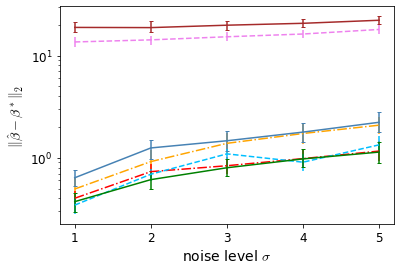

In [150]:
plt.errorbar(xs, LA_risk_med, yerr = LA_risk_err, capsize = 2, color = 'brown', label = "OLS, LASSO")
plt.errorbar(xs, EN_risk_med, yerr = EN_risk_err, fmt = '--', color = 'violet', label = "EN")
plt.errorbar(xs, FL_risk_med, yerr = FL_risk_err, fmt = '-.',color = 'orange', label = "FL")
plt.errorbar(xs, SL_risk_med, yerr = SL_risk_err, fmt = '-.', color = 'red', label = "SL")
plt.errorbar(xs, GTVEST_risk_med, yerr = GTVEST_risk_err, capsize = 2, color = 'steelblue', label = "GTV")
plt.errorbar(xs, GTVORC_risk_med, yerr = GTVORC_risk_err,  fmt = '--',color = 'deepskyblue', label = "GTV-oracle", linewidth = 1.5)
plt.errorbar(xs, GEN_risk_med, yerr = GEN_risk_err, capsize = 2, color = 'green', label = "GEN")
plt.yscale("log")
plt.yticks([1, 10], size = 12)
plt.xticks(["1",'2','3','4', '5'], size = 12)
plt.xlabel(r"noise level $\sigma$", size = 14)
plt.ylabel(r'$\| \hat{\beta} - \beta^*\|_2$', size = 14)
plt.savefig('154a_v2.jpg', bbox_inches='tight', dpi = 600)

In [151]:
LA_pred_med = [np.median(r) for r in [ap1, bp1, cp1, dp1, ep1]]
LA_pred_err = [[np.median(r) - np.quantile(r, 0.25) for r in [ap1, bp1, cp1, dp1, ep1]], [np.quantile(r, 0.75) - np.median(r) for r in [ap1, bp1, cp1, dp1, ep1]]]

In [193]:
GEN_pred_err

[[0.05792864392438407,
  0.1905323814463885,
  0.40261998580692293,
  0.6620429328941406,
  1.0426707051096085],
 [0.07035282573829435,
  0.26999988091078087,
  0.5690020363947113,
  0.9438176408286099,
  1.5116339286512934]]

In [152]:
EN_pred_med = [np.median(r) for r in [ap3, bp3, cp3, dp3, ep3]]
EN_pred_err = [[np.median(r) - np.quantile(r, 0.25) for r in [ap3, bp3, cp3, dp3, ep3]], [np.quantile(r, 0.75) - np.median(r) for r in [ap3, bp3, cp3, dp3, ep3]]]

In [153]:
FL_pred_med = [np.median(r) for r in [ap4, bp4, cp4, dp4, ep4]]
FL_pred_err = [[np.median(r) - np.quantile(r, 0.25) for r in [ap4, bp4, cp4, dp4, ep4]], [np.quantile(r, 0.75) - np.median(r) for r in [ap4, bp4, cp4, dp4, ep4]]]

In [154]:
SL_pred_med = [np.median(r) for r in [ap5, bp5, cp5, dp5, ep5]]
SL_pred_err = [[np.median(r) - np.quantile(r, 0.25) for r in [ap5, bp5, cp5, dp5, ep5]], [np.quantile(r, 0.75) - np.median(r) for r in [ap5, bp5, cp5, dp5, ep5]]]

In [155]:
GTVEST_pred_med = [np.median(r) for r in [ap6, bp6, cp6, dp6, ep6]]
GTVEST_pred_err = [[np.median(r) - np.quantile(r, 0.25) for r in [ap6, bp6, cp6, dp6, ep6]], [np.quantile(r, 0.75) - np.median(r) for r in [ap6, bp6, cp6, dp6, ep6]]]

In [156]:
GTVORC_pred_med = [np.median(r) for r in [ap7, bp7, cp7, dp7, ep7]]
GTVORC_pred_err = [[np.median(r) - np.quantile(r, 0.25) for r in [ap7, bp7, cp7, dp7, ep7]], [np.quantile(r, 0.75) - np.median(r) for r in [ap7, bp7, cp7, dp7, ep7]]]

In [157]:
GEN_pred_med = [np.median(r) for r in [ap8, bp8, cp8, dp8, ep8]]
GEN_pred_err = [[np.median(r) - np.quantile(r, 0.25) for r in [ap8, bp8, cp8, dp8, ep8]], [np.quantile(r, 0.75) - np.median(r) for r in [ap8, bp8, cp8, dp8, ep8]]]

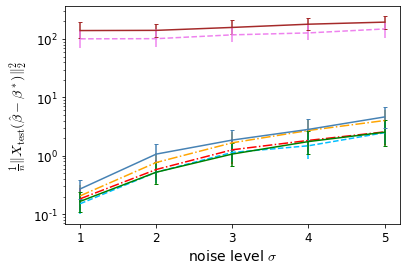

In [158]:
plt.errorbar(xs, LA_pred_med, yerr = LA_pred_err, capsize = 2, color = 'brown', label = "OLS, LASSO")
plt.errorbar(xs, EN_pred_med, yerr = EN_pred_err, fmt = '--', color = 'violet', label = "EN")
plt.errorbar(xs, FL_pred_med, yerr = FL_pred_err, fmt = '-.',color = 'orange', label = "FL")
plt.errorbar(xs, SL_pred_med, yerr = SL_pred_err, fmt = '-.', color = 'red', label = "SL")
plt.errorbar(xs, GTVEST_pred_med, yerr = GTVEST_pred_err, capsize = 2, color = 'steelblue', label = "GTV")
plt.errorbar(xs, GTVORC_pred_med, yerr = GTVORC_pred_err, fmt = '--', color = 'deepskyblue', label = "GTV-oracle", linewidth = 1.5)
plt.errorbar(xs, GEN_pred_med, yerr = GEN_pred_err, capsize = 2, color = 'green', label = "GEN")
plt.yscale("log")
plt.yticks([0.1, 1, 10, 100], size = 12)
plt.xticks(["1",'2','3','4', '5'], size = 12)
plt.xlabel(r"noise level $\sigma$", size = 14)
plt.ylabel(r'$\frac{1}{n}\| X_{\mathrm{test}}(\hat{\beta} - \beta^*)\|_2^2$', size = 14)
plt.savefig('154b_v2.jpg', bbox_inches='tight', dpi = 600)